# Segment 3: TimML

TimML is an AEM model written by Mark Bakker. It is written in Python and makes use of the Matplotlib for visualization. This makes it feasible to use Jupyter as a User Interface, the official tutorial makes use of Jupyter as well.

## Library Features



+ TimML is **unitless** - this means that all parameters have to be consistently entered. Recommend to use SI units throughout

+ TimML is **steady state**

+ TimML supports **any number of layers** 

Two different Model types are supported:
+ **Multi-Aquifer Model** - sequence of Aquifers interbedded with aquitards (leaky layers)
+ **Quasi-3D-Model** - sequence of layers with user-defined properties

In [1]:
# import the library
import timml
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# create a simple 1-Lyer Model with k = 10 m/d, topography 10 masl, bottom 0 masl
ml = timml.ModelMaq(kaq=10, z=[10, 0])

## Elements

All aspects of the models are supplied in the form of Analytic Elements.

### Background / Reference

**`timml.constant`** aka **reference head** fixes the solution at a certain place to a certain head value. The reference head is often located far away from the actual model area (keep in mind that the model area of an AEM is usually unbounded.

(Note that this is **not** the same as a Dirichlet boundary condition in a numerical model).

To add an element to the model, create a new instance of the elements class. The first argument of the constructor is the model we have created before, followed by the parameters corresponding to the specific element type.

In [3]:
# add a reference head of  masl at (-1000|0)
rf = timml.Constant(ml, xr=-1000, yr=0, hr=41)

besides the reference level, we also impose a regional flow to the model.

This element is called **`timml.Uflow`**.

In [4]:
# add a regional flow westwards 
uf = timml.Uflow(ml, slope=0.001, angle=0)

Now, we can solve the simple model and plot its results

In [5]:
# solve the model
ml.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


TimML provides a number of convenience functions for visualization. The following one-liner creates and plot the head contours of the model

C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


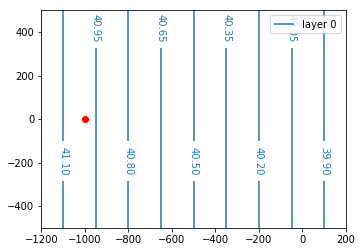

In [6]:
# make a contour plot
ml.contour(win=[-1200, 200, -500, 500],  # bounding box of window
           ngr=50,
           levels=10, labels=True, decimals=2, legend=True)
# show the reference head
plt.scatter([-1000],[0], color='r')

### Boundary conditions
#### wells (head or flux-specified)

Wells are point sinks in the model. They can be either flux-specified (timml.Well) or head-specified (timml.HeadWell). An entry resistance can be added optionally.

Number of elements, Number of equations: 3 , 1
...
solution complete
...

C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


.....

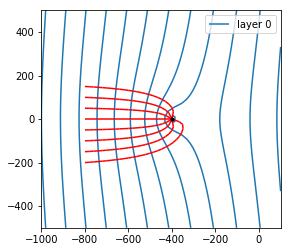

In [7]:
# add a well with 50 m3/d at (400|0) and radius 0.2 m
w = timml.Well(ml, xw=-400, yw=0, Qw=50., rw=0.2)

# solve and plot the model
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1))

# streamlines (must run in same cell as ml.contour)
ml.tracelines(-800 * np.ones(8),        # vector of x-coordinates
              np.arange(-200, 200, 50), # vector of y-coordinates
              np.zeros(8),              # vector of z-coordinates
              hstepmax=20,
              color="red")

Besides plotting the heads, the well object can now be interrogated to obtain the discharge and head of the well:

In [8]:
well_head = w.headinside()[0]
well_discharge = w.discharge()[0]

print("The well with discharge {:.2f} m³/d has a water level of {:.2f} m".format(well_discharge, well_head ))

The well with discharge 50.00 m³/d has a water level of 39.76 m


#### line sinks (head- or flux-specified, resistance)

+ HeadLineSink is a line-sink for which the head is specified along the line-sink. 
+ HeadLineSinkString is a string of head-specified line-sinks
+ LineSinkDitch is a line-sink for which the head is unknown and uniform and the total discharge is specified
+ LineSinkDitchString is a string of line-sink ditch elements

####  Line Doublet

A line Doublet is a wall that can be either impermeable or leaky.
It can be specified either as a line or a string of lines.

+ ImpLineDoublet is used to simulate one straight impermeable wall
+ ImpLineDoubletString is an impermeable wall represented by a poly line of straight segments
+ LeakyLineDoublet is used to simulate one straight leaky wall
+ LeakyLineDoubletString is a leaky wall represented by a poly line of straight segments


Number of elements, Number of equations: 4 , 3
....
solution complete
.

C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


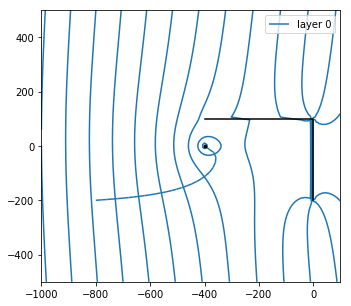

In [9]:
# add a well with 50 m3/d at (400|0) and radius 0.2 m

line_geometry = [(-400, 100),
               (0, 100),
               (0, -200)]

ldblt = timml.ImpLineDoubletString(ml, xy=line_geometry)

# solve and plot the model
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=100, levels=np.arange(39, 42, 0.1))
ml.tracelines(-800 * np.ones(1), -200 * np.ones(1), np.zeros(1), hstepmax=20)

# increase figure size
plt.gcf().set_size_inches(12,5)

####  Area Sinks

Area Sinks can be used to model recharge (area sources) by applying a negative sink rate.

Only circular Area sinks are currently (version 5) implemented Area Source, polygonal and strip area sinks are planned for the future.

The example below hasArea sinks are currently not being plotted with the model, 

Number of elements, Number of equations: 5 , 3
.....
solution complete


C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


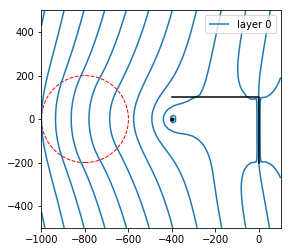

In [10]:
# x, y of center (-800|0)
radius = 200 #m
recharge = 0.5 / 1000 # m/d

circsink = timml.CircAreaSink(ml, -800, 0, radius, -recharge)

# solve and plot the model
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1))

# add circle to plot
circle1=plt.Circle((-800, 0), radius, color='r', fill=False, linestyle="--")
plt.gcf().gca().add_artist(circle1)  # gcf/gca: Get Current Figure/Axis

### Polygonal Inhomogeneity

Currently only available in Multi-Aquifer Model (not Quasi 3D model).


Number of elements, Number of equations: 14 , 36
..............
solution complete


C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


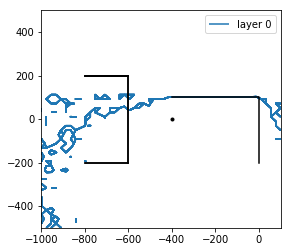

In [11]:
poly_geometry = [(-800, 200),
               (-600, 200),
               (-600, -200),
                (-800, -200),
                (-800, 200)]


polinh = timml.PolygonInhomMaq(ml, poly_geometry, [10])

# solve and plot the model
ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1))

Number of elements, Number of equations: 11 , 34
...........
solution complete


C:\Anaconda3\envs\py36_a\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


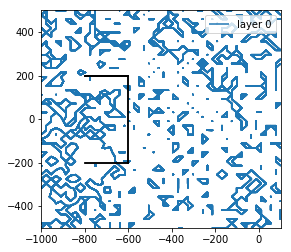

In [12]:
ml = timml.ModelMaq(kaq=10, z=[10, 0])

# add a reference head of  masl at (-1000|0)
rf = timml.Constant(ml, xr=-1000, yr=0, hr=41)

# add a regional flow westwards 
uf = timml.Uflow(ml, slope=0.001, angle=0)

# add polygonal heterog
polinh = timml.PolygonInhomMaq(ml, poly_geometry, 10, z=[10, 0])


ml.solve()
ml.contour(win=[-1000, 100, -500, 500], ngr=50, levels=np.arange(39, 42, 0.1))